In [ ]:
#numpy basics: arrays and vectorized computation

In [23]:
###C4.1构建ndarray的多维向量对象###
################################
import numpy as np
dat = np.random.randn(2,3)
print(dat + dat)
dat.shape
dat.dtype
#ndarrays构建
dat1 = [5,6,7.8,2,3]
arr1 = np.array(dat1)
arr1
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2
arr2.ndim  #维数
arr2.shape   #每个维数的特征
#构建0数组
np.zeros(10).shape  #构建一维，10个0
np.zeros((3,6))
np.empty((2,3,4))
#构建等比序列
np.arange(15)
#array计算
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr * arr
arr - arr
1/arr  
arr ** 0.5
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2 > arr
#array指针和切片,和自带的list不一样，array slides是原始array的呈现，而非拷贝。任何变化都会反馈到原array上。
arr = np.arange(10)
arr_slice = arr[5:8]
arr_slice[1] = 12345
print(arr, arr_slice)
arr_slice[:] = 64
print(arr, arr_slice)
#boolin indexing
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(data[names == 'Bob'])  #对data取0和3行
#取不是Bob时对应的行。~会取相反的情况；构建cond，然后~cond可以得到相同的结果。
#添加条件选择 &和|
data[~(names == 'Bob')]
cond = names == 'Bob'
data[~cond]
mask = (names == 'Bob') | (names == 'Will')
data[mask] #取bob和will相对应的行
#自定义调整
arr = np.arange(32).reshape((8, 4))
arr[[1, 5, 7, 2], [0, 3, 1, 2]]   #行按1572顺序输出，列按0312顺序输出
'''In [124]: arr[[1, 5, 7, 2], [0, 3, 1, 2]]
    Out[124]: array([ 4, 23, 29, 10])'''
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]  #行按1572输出，保持行，对列排序
'''array([[ 4,  7,  5,  6],
           [20, 23, 21, 22],
           [28, 31, 29, 30],
           [ 8, 11,  9, 10]])
'''
#矩阵运算
arr = np.arange(15).reshape((3, 5))
arr.T
np.dot(arr.T, arr)
#高维数组，tanspose来调整
arr = np.arange(16).reshape((2, 2, 4))
'''array([[[ 0,  1,  2,  3],
               [4, 5, 6, 7]], 
            [[ 8, 9, 10, 11],
            [12, 13, 14, 15]]])'''
arr.transpose((1, 0, 2))    #比如7之前是(0,1,3)，经（1，0，2）转后变(3,1,0)
'''array([[[ 0,  1,  2,  3],
            [ 8, 9, 10, 11]], 
            [[4, 5, 6, 7],
            [12, 13, 14, 15]]])'''
arr.swapaxes(1, 2) #括号里是一对数，比如这里是原来的(2,2,4) -> (2,4,2)
'''
array([[[ 0,  4],
[1, 5], [2, 6], [ 3, 7]],
           [[ 8, 12],
            [ 9, 13],
            [10, 14],
            [11, 15]]])
'''

[[-1.73088258  0.1711034  -0.85299347]
 [-0.25481033  2.01142068  0.89545582]]
[    0     1     2     3     4     5 12345     7     8     9] [    5 12345     7]
[ 0  1  2  3  4 64 64 64  8  9] [64 64 64]
[[-0.15410417 -2.02455295  0.10629337  0.43055832]
 [-1.04177577  0.38991246  1.84583335 -1.49946619]]


'array([[[ 0,  1,  2,  3],\n            [ 8, 9, 10, 11]], \n            [[4, 5, 6, 7],\n            [12, 13, 14, 15]]])'

In [ ]:
###C4.2  Fast Element-Wise Array Functions###
#############################################
#两一元数组取最大值
x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x, y)
'''
array([-0.0119,  1.0048,  1.3272, -0.9193, -1.5491,  0.0222,  0.7584,
-0.6605])
array([ 0.8626, -0.01  ,  0.05  ,  0.6702,  0.853 , -0.9559, -0.0235,
-2.3042])
array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
-0.6605])
'''
#modf返回整数和小数两个部分的array
arr = np.random.randn(7) * 5
remainder, whole_part = np.modf(arr)

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

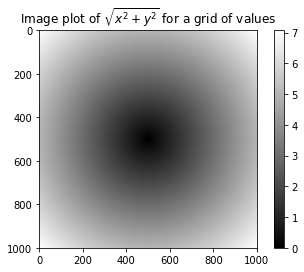

In [33]:
###C4.3 Array-Oriented Programming with Arrays###
#############################################
#meshgrid构建二位网格（grid）
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)  #xs是points为行，len(points)列；ys是points为列，len(points)为行
z=np.sqrt(xs**2+ys**2)
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
#np.where(cond,x,y)cond条件符合取x,否则y。可以一维数组也可多维。
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
np.where(cond, xarr, yarr)
'''
array([ 1.1,  2.2,  1.3,  1.4,  2.5])
'''
arr = np.random.randn(4, 4)
np.where(arr > 0, 2, -2)
np.where(arr > 0, 2, arr)
'''
array([[-0.5031, -0.6223, -0.9212, -0.7262],
[2. , 2. ,-1.1577, 2. ], [2. , 2. , 2. ,-0.9975], [ 2. , -0.1316, 2. , 2. ]])
'''
#对array矩阵求统计值
arr = np.random.randn(5,4)
arr.mean()
np.mean(arr)
arr.sum()
arr.mean(axis=1) #axis=1对行求 axis=0对列求
arr.cumprod(axis=1) #对行临近乘法
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum() #累积和
#布尔值计算
(arr>0).sum()
#any和all是针对布尔值的判断，any有一个true即可。
bools = np.array([False, False, True, False])
bools.any()  #true
bools.all()  #false
#排序
arr.sort() #从小到大
arr = np.random.randn(5,3)
arr.sort(1) #对行升序排列
#unique和其他逻辑
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
#np.in1d可以检测某些值是否在另一个array里
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])    #array([ True, False, False, True, True, False, True], dtype=bool)

In [ ]:
###C4.4 File Input and Output with Arrays###
#############################################
#np.savez存储多个array，生成.npz文件。np.load导入
np.savez('array_archive.npz', a=arr, b=arr)  #不压缩
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)   #压缩
arch = np.load('array_archive.npz')
arch['b'];arch['a']

In [ ]:
###C4.5 Linear Algebra###
#############################################
#点乘
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.dot(y)  #np.dot(x,y)
'''array([[  28.,   64.],
[ 67., 181.]])'''
np.dot(x, np.ones(1))
'''
array([  6.,  15.])
'''
#numpy.linalg
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat) #求逆
mat.dot(inv(mat))
q, r= qr(mat) #因式分解，q是正交，r是上三角矩阵


In [ ]:
###C4.6 Pseudorandom Number Generation###
#############################################
#标准正态分布
samples = np.random.normal(size=(4, 4))
#相对于自带的random模块，np.random更快：
#伪随机，基于随机数生成器的seed，可以用np.random.seed改变random number。
np.random.seed(1234)
#np.random用全体的随机seed。为了避免整体都用，用np.random.RandomState去构造一个随机数生成器，与其他区别开来。
rng = np.random.RandomState(1234)
rng.randn(10)

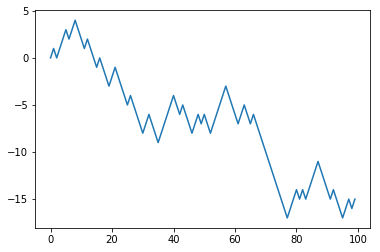

In [16]:
###C4.7 Example: Random Walks###
#############################################
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])
#模拟多个随机游走
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [11]:
############################################
#100题numpy#################################
############################################

-1


In [26]:
#1. 导入numpy库并简写为 np (★☆☆)
import numpy as np
#2. 打印numpy的版本和配置说明 (★☆☆)
print(np.__version__)
#3. 创建一个长度为10的空向量 (★☆☆)
np.ones(10)
#4. 如何找到任何一个数组的内存大小？ (★☆☆)
Z = np.ones((10,10))
print("%d bytes" %(Z.size*Z.itemsize))
#5. 如何从命令行得到numpy中add函数的说明文档? (★☆☆)
import numpy as np
np.info(np.add)
#6. 创建一个长度为10并且除了第五个值为1的空向量 (★☆☆)
z = np.zeros(10)
z[4] = 1
#7. 创建一个值域范围从10到49的向量(★☆☆)
z = np.arange(10,50)
#8. 反转一个向量(第一个元素变为最后一个) (★☆☆)
z = np.arange(50)
z = z[::-1]
#9. 创建一个 3x3 并且值从0到8的矩阵(★☆☆)
z = np.arange(9).reshape(3,3)
print(z)
#10. 找到数组[1,2,0,0,4,0]中非0元素的位置索引 (★☆☆)
z = [1,2,0,0,4,0]
print(np.nonzero(z))
#11. 创建一个 3x3 的单位矩阵 (★☆☆)
np.eye(3)
#12. 创建一个 3x3x3的随机数组 (★☆☆)
np.random.randn((3,3,3))
#13. 创建一个 10x10 的随机数组并找到它的最大值和最小值 (★☆☆)
z = np.random.randn((10,10))
z.max();z.min()
#14. 创建一个长度为30的随机向量并找到它的平均值 (★☆☆)
z = np.random.randn(30)
z.mean()
#15. 创建一个二维数组，其中边界值为1，其余值为0 (★☆☆)¶
z = np.ones((6,6))
z[1:-1,1:-1] = 0
#16. 对于一个存在在数组，如何添加一个用0填充的边界? (★☆☆)
z = np.ones((6,6))
Z = np.pad(Z, pad_width=1, mode='constant', constant_values=0)
#17. 以下表达式运行的结果分别是什么? (★☆☆)
0 * np.nan   nan
np.nan == np.nan    true
np.inf > np.nan     false
np.nan - np.nan     nan
0.3 == 3 * 0.1      false
#18. 创建一个 5x5的矩阵，并设置值1,2,3,4落在其对角线下方位置 (★☆☆)
Z = np.diag(1+np.arange(4),k=-1) #k=-1时候取对角下方的对角
np.info(np.diag)
#19. 创建一个8x8 的矩阵，并且设置成棋盘样式 (★☆☆)
Z = np.zeros((8,8),dtype=int)
Z[1::2,::2] = 1
Z[::2,1::2] = 1
#20. 考虑一个 (6,7,8) 形状的数组，其第100个元素的索引(x,y,z)是什么?
unravel_index(100,(6,7,8))
#21. 用tile函数去创建一个 8x8的棋盘样式矩阵(★☆☆)
np.tile(np.array([[0,1],[1,0]]), (4,4))
#22. 对一个5x5的随机矩阵做归一化(★☆☆)
z = np.random.randn((5,5))
zmax = z.max();zmin = z.min()
z = (z-zmax)/(zmax-zmin)
#23. 创建一个将颜色描述为(RGBA)四个无符号字节的自定义dtype？(★☆☆)
color = np.dtype([("r", np.ubyte, 1),
                   ("g", np.ubyte, 1),
                   ("b", np.ubyte, 1),
                   ("a", np.ubyte, 1)])
#24. 一个5x3的矩阵与一个3x2的矩阵相乘，实矩阵乘积是什么？ (★☆☆)
np.dot(np.ones((5,3)), np.dot((3,2)))
#25. 给定一个一维数组，对其在3到8之间的所有元素取反 (★☆☆)
z = np.arange(10)
z[ (z>=3) & (z<=8)] *= -1
#26. 下面脚本运行后的结果是什么? (★☆☆)
print(sum(range(5),-1))   9
from numpy import *      
print(sum(range(5),-1)) #10
#27. 考虑一个整数向量Z,下列表达合法的是哪个? (★☆☆)
Z**Z  #合法
2 << Z >> 2  #不合法
Z <- Z  #合法
1j*Z  #合法
Z/1/1  #合法
Z<Z>Z  #不合法
#28. 下列表达式的结果分别是什么?(★☆☆)
np.array(0) / np.array(0)  #nan
np.array(0) // np.array(0)  #0
np.array([np.nan]).astype(int).astype(float)  #[-9.22337204e+18]
#29. 如何从零位对浮点数组做舍入 ? (★☆☆)
Z = np.random.uniform(-10,+10,10)
print (np.copysign(np.ceil(np.abs(Z)), Z))
#30. 如何找到两个数组中的共同元素? (★☆☆)
Z1 = np.random.randint(0,10,10)
Z2 = np.random.randint(0,10,10)
print(np.intersect1d(Z1,Z2))
#31. 如何忽略所有的 numpy 警告(尽管不建议这么做)? (★☆☆)
defaults = np.seterr(all="ignore")
#32. 下面的表达式是正确的吗? (★☆☆)
false
#33. 如何得到昨天，今天，明天的日期? (★☆☆)
yesterday = np.datetime64('today', 'D') - np.timedelta64(1, 'D')
today     = np.datetime64('today', 'D')
tomorrow  = np.datetime64('today', 'D') + np.timedelta64(1, 'D')
print ("Yesterday is " + str(yesterday))
print ("Today is " + str(today))
print ("Tomorrow is "+ str(tomorrow))
#34. 如何得到所有与2016年7月对应的日期？ (★★☆)
Z = np.arange('2016-07', '2016-08', dtype='datetime64[D]')
print(Z)
#35. 如何直接在位计算(A+B)\*(-A/2)(不建立副本)? (★★☆)
A = np.ones(3)*1
B = np.ones(3)*2
C = np.ones(3)*3
np.add(A,B,out=B)
#36. 用五种不同的方法去提取一个随机数组的整数部分(★★☆)
Z = np.random.uniform(0,10,10)
print (Z - Z%1)
print (np.floor(Z))
print (np.ceil(Z)-1)
print (Z.astype(int))
print (np.trunc(Z))
#37. 创建一个5x5的矩阵，其中每行的数值范围从0到4 (★★☆)
Z = np.zeros((5,5))
Z += np.arange(5)
print (Z)
#38. 通过考虑一个可生成10个整数的函数，来构建一个数组(★☆☆)
def generate():
    for x in range(10):
        yield x
Z = np.fromiter(generate(),dtype=float,count=-1)
print (Z)
#39. 创建一个长度为10的随机向量，其值域范围从0到1，但是不包括0和1 (★★☆)
Z = np.linspace(0,1,11,endpoint=False)[1:]
#40. 创建一个长度为10的随机向量，并将其排序 (★★☆)
np.random.random(10).sort()
#41.对于一个小数组，如何用比 np.sum更快的方式对其求和？(★★☆)
z = np.arange(10)
np.add.reduce(z)
#42. 对于两个随机数组A和B，检查它们是否相等(★★☆)
A = np.random.randint(0,2,5)
B = np.random.randint(0,2,5)
equal = np.allclose(A,B)   #equal = np.array_equal(A,B)
print(equal)
#43. 创建一个只读数组(read-only) (★★☆)
Z = np.zeros(10)
Z.flags.writeable = False
Z[0] = 1
#44. 将笛卡尔坐标下的一个10x2的矩阵转换为极坐标形式(★★☆)
Z = np.random.random((10,2))
X,Y = Z[:,0], Z[:,1]
R = np.sqrt(X**2+Y**2)
T = np.arctan2(Y,X)
print (R)
print (T)
#45. 创建一个长度为10的向量，并将向量中最大值替换为1 (★★☆)
Z = np.random.random(10)
Z[Z.argmax()] = 0
#创建一个结构化数组，并实现 x 和 y 坐标覆盖 [0,1]x[0,1] 区域 (★★☆)
Z = np.zeros((5,5), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,5),
                             np.linspace(0,1,5))
print(Z)
#47. 给定两个数组X和Y，构造Cauchy矩阵C (Cij =1/(xi - yj))
X = np.arange(8)
Y = X + 0.5
C = 1.0 / np.subtract.outer(X, Y)
print(np.linalg.det(C))
#48. 打印每个numpy标量类型的最小值和最大值？ (★★☆)
for dtype in [np.int8, np.int32, np.int64]:
    print(np.iinfo(dtype).min)
    print(np.iinfo(dtype).max)

for dtype in [np.float32, np.float64]:
    print(np.finfo(dtype).min)
    print(np.finfo(dtype).max)
    print(np.finfo(dtype).eps)
#49. 如何打印一个数组中的所有数值? (★★☆)
np.set_printoptions(threshold=np.nan)
Z = np.zeros((16,16))
print (Z)
#50. 给定标量时，如何找到数组中最接近标量的值？(★★☆)
Z = np.arange(100)
v = np.random.uniform(0,100)
index = (np.abs(Z-v)).argmin()
print (Z[index])




1.15.1
800 bytes
add(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Add arguments element-wise.

Parameters
----------
x1, x2 : array_like
    The arrays to be added.  If ``x1.shape != x2.shape``, they must be
    broadcastable to a common shape (which may be the shape of one or
    the other).
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or `None`,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    Values of True indicate to calculate the ufunc at that position, values
    of False indicate to leave the value in the output alone.
**kwargs
    For other keyword-only arguments, see the
    :ref:`ufunc docs <ufuncs.kwargs>`.

Returns
-------
add : ndarray 